In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
database_path = "Resources/hawaii.sqlite"

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

#data = engine.execute("SELECT * FROM hawaii")

#for record in data:
  #  print(record)
## Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [ ]:
# View all of the classes that automap found


In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [31]:
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [33]:
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1460725dac0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [36]:
conn = engine.connect()
data = pd.read_sql("select * from measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [ ]:
first_row = session.query(Station).first()
first_row.__dict__

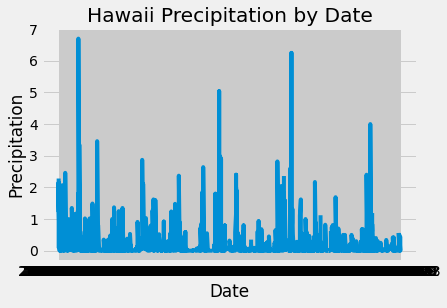

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prcp_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>last_year).order_by(Measurement.date).all()
prcp_result

prcp_df = pd.DataFrame(prcp_result)
prcp_df

plt.plot(prcp_df.date, prcp_df.prcp)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Hawaii Precipitation by Date")
plt.show()
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 53., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

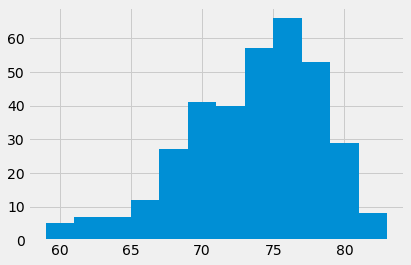

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_USC00519281 = session.query(Measurement.tobs).filter(Measurement.date>=last_year).filter(Measurement.station=='USC00519281').all()
active_USC00519281
df = pd.DataFrame(active_USC00519281)
plt.hist(df.tobs, bins=12)

# Close session

In [53]:
# Close Session
session.close()